In [1]:
from src.utils import read_data, missing_vals
from src.regression_algorithms import run_reg_pred, algo_map
from src.plot_functions import line_plot_date
from sklearn.model_selection import TimeSeriesSplit
from datetime import datetime, timedelta
import calendar
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from IPython.display import display_html, display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

def display_dfs(dfs, gap=50, justify='center'):
    html = ""
    for title, df in dfs.items():  
        df_html = df._repr_html_()
        cur_html = f'<div> <h3>{title}</h3> {df_html}</div>'
        html +=  cur_html
    html= f"""
    <div style="display:flex; gap:{gap}px; justify-content:{justify};">
        {html}
    </div>
    """
    display_html(html, raw=True)

In [4]:
dat = read_data()
dat["Forecast_start"] = False

# extracting Month and Year from date which are important features focussing on the seasonly cyclical patterns
# improving accuracy from ~65% to ~75%
dat["Month"] = pd.DatetimeIndex(dat["Date"]).month
dat["Year"] = pd.DatetimeIndex(dat["Date"]).month

In [5]:
percentiles = [.01, .025, .05, .1, .25, .5, .75, .95, .975, .99, .999]
dfs1 = {'Head': dat.head(5), 'Tail': dat.tail(5)}
dfs2 = {'DTypes': pd.DataFrame(dat.dtypes), 'Describe': dat.describe(percentiles=percentiles).T}
display_dfs(dfs1, justify='flex-start')
display_dfs(dfs2, justify='flex-start')

print("\nMissing values: ")
display(miss := missing_vals(dat))

,Date,Consumption,Forecast_start,Month,Year
0,2015-04-01,357.073,False,4,4
1,2015-04-02,341.931,False,4,4
2,2015-04-03,318.777,False,4,4
3,2015-04-04,312.494,False,4,4
4,2015-04-05,270.837,False,4,4
,Date,Consumption,Forecast_start,Month,Year
1822,2020-03-27,237.171,False,3,3
1823,2020-03-28,229.744,False,3,3
1824,2020-03-29,297.636,False,3,3
1825,2020-03-30,323.811,False,3,3


DTypes 

 
 
 
 
 0 
 
 
 
 
 Date 
 datetime64[ns] 
 
 
 Consumption 
 float64 
 
 
 Forecast_start 
 bool 
 
 
 Month 
 int64 
 
 
 Year 
 int64 
 
 
 
 Describe 

 
 
 
 
 count 
 mean 
 std 
 min 
 1% 
 2.5% 
 5% 
 10% 
 25% 
 50% 
 75% 
 95% 
 97.5% 
 99% 
 99.9% 
 max 
 
 
 
 
 Consumption 
 1827.0 
 257.885096 
 100.993368 
 82.675 
 109.32474 
 118.3223 
 129.2541 
 141.7106 
 174.6725 
 242.719 
 327.841 
 442.6629 
 475.45865 
 523.17992 
 574.534678 
 589.269 
 
 
 Month 
 1827.0 
 6.521073 
 3.450157 
 1.000 
 1.00000 
 1.0000 
 1.0000 
 2.0000 
 4.0000 
 7.000 
 10.000 
 12.0000 
 12.00000 
 12.00000 
 12.000000 
 12.000 
 
 
 Year 
 1827.0 
 6.521073 
 3.450157 
 1.000 
 1.00000 
 1.0000 
 1.0000 
 2.0000 
 4.0000 
 7.000 
 10.000 
 12.0000 
 12.00000 
 12.00000 
 12.000000 
 12.000


Missing values: 


,Missing Values,% of Total Values


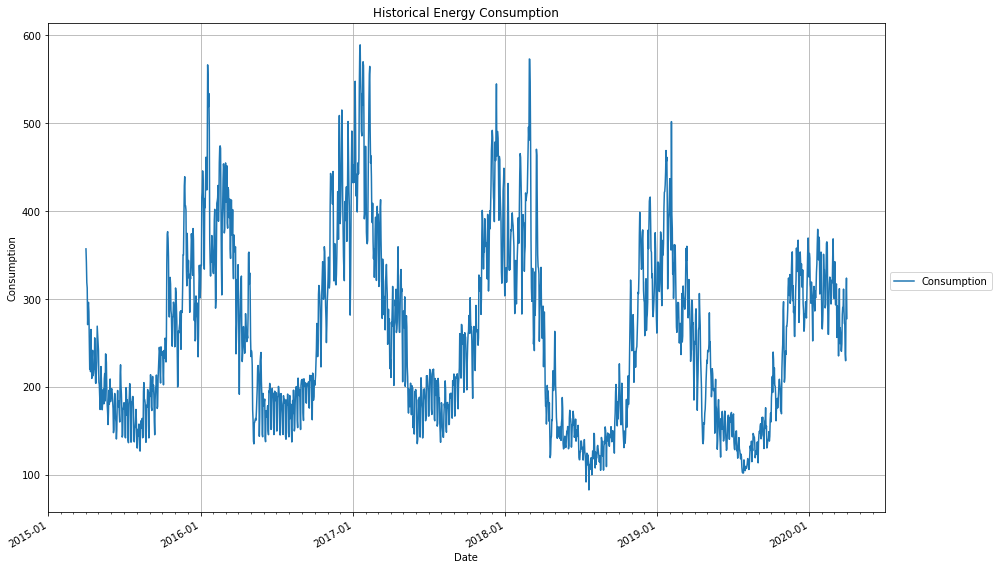

In [6]:
_ = line_plot_date(dat.copy(), "Date", ["Consumption"], "Historical Energy Consumption", ("Date", "Consumption"), fig_size=(15, 10))

In [7]:
features = ["Consumption", "Month", "Year"]

In [8]:
preds = {"algo": [], "preds": [], "accuracy": [], "mse": [], "iter": []}
NUM_DAYS = 365
NUM_ITER = 25  #  25 iterations of running all regression algos takes around 50 seconds

# voting algos
#vp_1 = [('rf1', algo_map["randomforest_1"]), ('gb1', algo_map["grad_boost_1"]), ('lr1', algo_map["lin_reg"])]
#vp_0 = [('rf0', algo_map["randomforest_0"]), ('gb0', algo_map["grad_boost_0"]), ('lr0', algo_map["lin_reg"])]

start_time = datetime.now()
for i in range(NUM_ITER):
    for algo_name, algo in algo_map.items():
        if 'vote_' not in algo_name:  # ignoring voting algos
            res = run_reg_pred(dat[features], "Consumption", NUM_DAYS, algo_name=algo_name)
            preds["preds"].append(res["preds"])
            preds["accuracy"].append(res["accuracy"])
            preds["mse"].append(res["mse"])
            preds["algo"].append(algo_name)
            preds["iter"].append(i)
end_time = datetime.now()

preds_df = pd.DataFrame(preds)
print(f"{NUM_ITER} iterations of running {len(algo_map.keys())} algos took {end_time - start_time} seconds")

Processing: lin_reg, iteration # 0
Processing: svr_linear, iteration # 0
Processing: svr_poly, iteration # 0
Processing: svr_poly_auto, iteration # 0
Processing: svr_poly_scale, iteration # 0
Processing: svr_poly_lerr, iteration # 0
Processing: svr_poly_auto_lerr, iteration # 0
Processing: svr_poly_scale_lerr, iteration # 0
Processing: svr_poly_coef, iteration # 0
Processing: svr_poly_auto_coef, iteration # 0
Processing: svr_poly_scale_coef, iteration # 0
Processing: svr_poly_lerr_coef, iteration # 0
Processing: svr_poly_auto_lerr_coef, iteration # 0
Processing: svr_poly_scale_lerr_coef, iteration # 0
Processing: lasso, iteration # 0
Processing: elasticnet, iteration # 0
Processing: ridge, iteration # 0
Processing: randomforest_0, iteration # 0
Processing: grad_boost_0, iteration # 0
Processing: grad_boost_0_LR, iteration # 0
Processing: hist_grad_boost_0, iteration # 0
Processing: hist_grad_boost_0_LR, iteration # 0
Processing: randomforest_1, iteration # 0
Processing: grad_boost_1, i

In [9]:
preds_df = preds_df.sort_values(by=["accuracy"], ascending=False)
preds_df.reset_index(inplace=True, drop=True)

In [10]:
preds_df

,algo,preds,accuracy,mse,iter
0,grad_boost_0,"[246.770284065972, 258.8643602933011, 258.8643...",0.757853,2409.085798,14
1,svr_poly_scale_coef,"[245.8545813901814, 256.77122218169745, 258.66...",0.749476,2459.633180,9
2,svr_poly_auto_coef,"[245.70879645729804, 256.55746206209824, 258.4...",0.748955,2521.106095,7
3,grad_boost_1,"[239.2973394262735, 264.02465537902845, 272.41...",0.746828,2496.523735,1
4,hist_grad_boost_0,"[250.42776875076714, 253.02566257926767, 277.5...",0.745703,2517.166394,21
...,...,...,...,...,...
595,svr_poly_lerr,"[218.31823681599087, 222.5275213989421, 223.34...",0.304531,7602.599730,12
596,svr_poly_scale_lerr,"[218.33927311694, 222.53262100233664, 223.3506...",0.300187,7626.405913,16
597,svr_poly_auto_lerr,"[217.03796073395057, 221.31371256104083, 222.1...",0.295692,7947.240133,15
598,svr_poly,"[205.27524697860534, 213.53841592071163, 215.1...",0.292600,5429.253839,3


In [11]:
preds_df_gp = preds_df.groupby(by=["algo"]).agg({
    "accuracy": ["min", "max", "mean"],
    "mse": ["min", "max", "mean"]})
preds_df_gp = preds_df_gp.sort_values(by=[("accuracy", "mean")], ascending=False)
preds_df_gp

accuracy                              mse  \
                               min       max      mean          min   
algo                                                                  
svr_poly_coef             0.639393  0.742862  0.708547  2511.775271   
svr_poly_scale_coef       0.640350  0.749476  0.707895  2459.633180   
grad_boost_1              0.675329  0.746828  0.706479  2496.523735   
svr_poly_auto_coef        0.660971  0.748955  0.705106  2521.106095   
hist_grad_boost_0         0.657080  0.745703  0.701559  2516.052793   
grad_boost_0              0.652207  0.757853  0.697187  2409.085798   
svr_poly_auto_lerr_coef   0.619368  0.679265  0.651826  3178.272732   
svr_linear                0.608114  0.699126  0.651107  2790.972723   
svr_poly_scale_lerr_coef  0.604854  0.671470  0.641829  3108.526229   
svr_poly_lerr_coef        0.570818  0.668498  0.641614  2885.644494   
randomforest_0            0.581460  0.671875  0.631971  3194.607018   
randomforest_1            0.573303  0.675558  0.628159  3081.837997   
hist_grad_boost_0_LR      0.577780  0.652235  0.617496  3200.617064   
lin_reg                   0.562455  0.676993  0.602784  3244.884718   
grad_boost_0_LR           0.568285  0.660173  0.599570  2890.583938   
lasso                     0.541162  0.656040  0.597481  3404.876709   
ridge                     0.525519  0.650845  0.597189  3429.842726   
elasticnet                0.484436  0.565054  0.534422  4122.770695   
svr_poly_scale            0.355855  0.496658  0.432637  4509.193941   
svr_poly_auto             0.357463  0.519088  0.428942  5104.383075   
svr_poly                  0.292600  0.496327  0.415637  5182.889250   
svr_poly_scale_lerr       0.300187  0.416983  0.357687  5796.439413   
svr_poly_auto_lerr        0.295692  0.408395  0.352642  6039.511286   
svr_poly_lerr             0.283353  0.428108  0.345613  6046.469672   

                                                    
                                  max         mean  
algo                                                
svr_poly_coef             3911.225945  3097.528708  
svr_poly_scale_coef       3580.682680  2993.234580  
grad_boost_1              3814.666281  3011.654761  
svr_poly_auto_coef        3643.395392  3071.396957  
hist_grad_boost_0         3748.765912  3063.731235  
grad_boost_0              3837.006773  3194.607841  
svr_poly_auto_lerr_coef   4199.653258  3627.612454  
svr_linear                4559.218731  3637.066659  
svr_poly_scale_lerr_coef  4319.953050  3837.334961  
svr_poly_lerr_coef        4934.373745  3723.297938  
randomforest_0            4459.681516  3820.006619  
randomforest_1            4206.785459  3793.383386  
hist_grad_boost_0_LR      5064.942839  3950.071491  
lin_reg                   4653.472078  4049.520831  
grad_boost_0_LR           4859.994251  4026.262073  
lasso                     5068.961818  4172.510122  
ridge                     4764.871341  4118.233044  
elasticnet                6129.682954  4868.766331  
svr_poly_scale            6944.238794  5900.187835  
svr_poly_auto             7159.437218  6043.876596  
svr_poly                  7145.734678  5953.984781  
svr_poly_scale_lerr       7626.405913  6652.548203  
svr_poly_auto_lerr        7947.240133  6783.187725  
svr_poly_lerr             8363.413499  6909.910266

In [12]:
best_pred = preds_df.iloc[0]
best_pred

algo                                             grad_boost_0
preds       [246.770284065972, 258.8643602933011, 258.8643...
accuracy                                             0.757853
mse                                               2409.085798
iter                                                       14
Name: 0, dtype: object

In [13]:
best_preds = best_pred["preds"]

In [14]:
last_date = dat.iloc[-1]["Date"]
last_date

Timestamp('2020-03-31 00:00:00')

In [15]:
forecast_dates = [last_date + timedelta(days=x + 1) for x in range(NUM_DAYS)]
assert len(best_preds) == len(forecast_dates)
forecast = {
    "Date": forecast_dates, 
    "Consumption": best_preds
}
forecast_df = pd.DataFrame(forecast)
forecast_df["Forecast_start"] = False
forecast_df.iloc[0, 2] = True  # set first row Forecast_start to True
forecast_df

,Date,Consumption,Forecast_start
0,2020-04-01,246.770284,True
1,2020-04-02,258.864360,False
2,2020-04-03,258.864360,False
3,2020-04-04,227.443795,False
4,2020-04-05,246.449410,False
...,...,...,...
360,2021-03-27,293.900008,False
361,2021-03-28,292.554807,False
362,2021-03-29,287.953641,False
363,2021-03-30,302.931822,False


In [16]:
full_df = pd.concat([dat, forecast_df], axis=0)
full_df

,Date,Consumption,Forecast_start,Month,Year
0,2015-04-01,357.073000,False,4.0,4.0
1,2015-04-02,341.931000,False,4.0,4.0
2,2015-04-03,318.777000,False,4.0,4.0
3,2015-04-04,312.494000,False,4.0,4.0
4,2015-04-05,270.837000,False,4.0,4.0
...,...,...,...,...,...
360,2021-03-27,293.900008,False,NaN,NaN
361,2021-03-28,292.554807,False,NaN,NaN
362,2021-03-29,287.953641,False,NaN,NaN
363,2021-03-30,302.931822,False,NaN,NaN


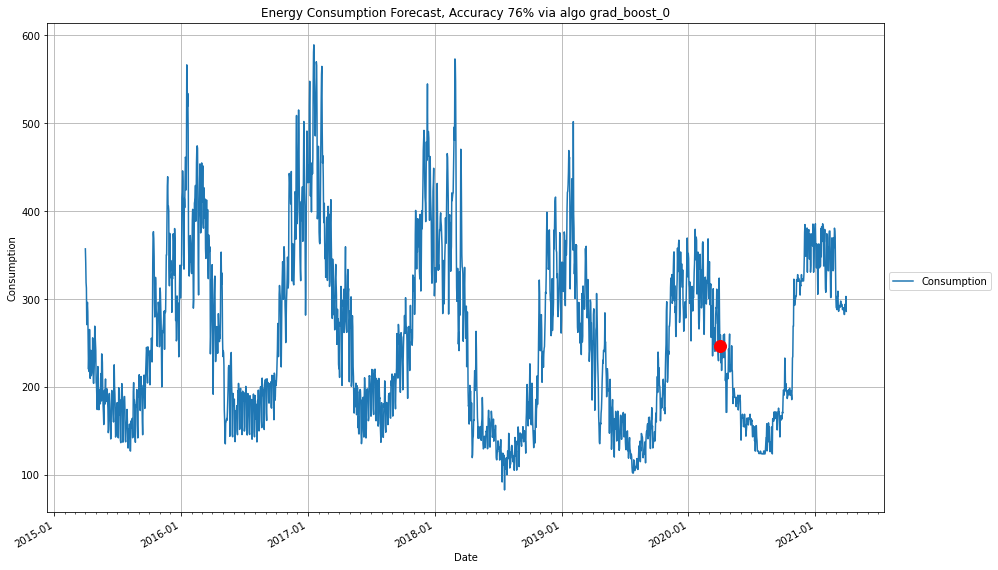

In [22]:
_ = line_plot_date(full_df.copy(), "Date", ["Consumption"], 
                   f"Energy Consumption Forecast, Accuracy {round(best_pred['accuracy'] * 100)}% via algo {best_pred['algo']}", 
                   ("Date", "Consumption"), 
                   markers={"Forecast_start": ("Consumption", "ro")},
                   fig_size=(15, 10))